In [1]:
import ROOT as rt
import sys
import os
import Plotting as plot
sys.path.append(os.getcwd())
from quantileRegression import quantileRegression, setupJoblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
#reload(plt)
plt.style.use('seaborn-talk')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)



Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
n_jobs=30
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [3]:
# Upload Dataframes:
periods=[1,2,3,4,5]
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5
Selecting events   [ 0 ,  19216524 ]  out of  19216524
number of events: 19216524


In [4]:
qr_mc1.correctAll(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_") 
qr_mc2.correctAll(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_") 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
qr_mc= quantileRegression("mc")
qr_mc.df = data2.reset_index() 

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5


In [5]:
%time qr_mc.correctPhoIso("../phoIsoStoch/corrections_hybrid.root",n_jobs=n_jobs)

Computing corrected photon isolation using /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/../phoIsoStoch/corrections_hybrid.root


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   23.4s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   23.6s remaining:  5.7min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   24.1s remaining:  2.7min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   24.5s remaining:  1.7min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   25.0s remaining:  1.2min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   25.8s remaining:   54.3s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   26.1s remaining:   41.4s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   26.6s remaining:   32.3s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   26.9s remaining:   25.3s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   27.1s remaining:   19.6s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   27.4s remaining:   15.0s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   27.6s remaining:   11.3s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 4.74 s, sys: 25.6 s, total: 30.3 s
Wall time: 36.4 s


In [6]:
qr_mc.df.index.size

9543155

In [7]:
dfmc     = qr_mc.getDF()

In [8]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4']
mvas = [ ("newPhoID",[]), ("newPhoIDcorrShowerShapes",showerShapes),  ("newPhoIDcorrIso",'PhoIso03'), 
         ("newPhoIDcorr",showerShapes+['PhoIso03']) ] 

weights = ("./phoIDMVAweights/MVAweights_80X_barrel_ICHEPvtx.xml","./phoIDMVAweights/MVAweights_80X_endcap_ICHEPvtx.xml")

In [9]:
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )

Computing newPhoID, correcting []


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:  1.5min remaining: 21.8min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:  1.6min remaining: 10.6min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  1.6min remaining:  6.6min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  1.6min remaining:  4.6min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.6min remaining:  3.4min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.7min remaining:  2.8min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.7min remaining:  2.1min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.8min remaining:  1.7min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.8min remaining:  1.3min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.8min remaining:  1.0min
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.9min remaining:   45.7s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 7.03 s, sys: 16.4 s, total: 23.4 s
Wall time: 2min 35s
Computing newPhoID, correcting []


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   43.2s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   43.8s remaining: 10.6min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   46.7s remaining:  5.3min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   48.3s remaining:  3.4min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   49.2s remaining:  2.4min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   50.4s remaining:  1.8min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   52.9s remaining:  1.4min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   53.3s remaining:  1.1min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   53.8s remaining:   50.5s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   55.3s remaining:   39.9s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   55.5s remaining:   30.5s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   56.5s remaining:   23.1s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing newPhoIDcorrShowerShapes, correcting ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4']


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   41.5s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   42.1s remaining: 10.2min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   42.6s remaining:  4.8min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   43.2s remaining:  3.0min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   44.8s remaining:  2.1min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   46.5s remaining:  1.6min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   48.1s remaining:  1.3min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   50.2s remaining:  1.0min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   51.4s remaining:   48.2s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   53.5s remaining:   38.6s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   54.4s remaining:   29.9s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   54.6s remaining:   22.4s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing newPhoIDcorrIso, correcting PhoIso03


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   42.3s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   42.7s remaining: 10.3min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   44.9s remaining:  5.0min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   46.5s remaining:  3.2min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   46.8s remaining:  2.2min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   47.2s remaining:  1.7min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   48.3s remaining:  1.3min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   48.5s remaining:   58.9s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   48.6s remaining:   45.6s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   50.3s remaining:   36.4s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   50.8s remaining:   27.9s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   52.4s remaining:   21.4s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing newPhoIDcorr, correcting ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'PhoIso03']


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   39.8s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   40.2s remaining:  9.7min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   41.0s remaining:  4.6min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   42.3s remaining:  2.9min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   42.7s remaining:  2.0min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   43.0s remaining:  1.5min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   44.8s remaining:  1.2min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   45.0s remaining:   54.6s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   46.6s remaining:   43.7s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   47.3s remaining:   34.2s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   48.2s remaining:   26.5s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   52.7s remaining:   21.6s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 15.9 s, sys: 40.6 s, total: 56.5 s
Wall time: 4min 41s


In [10]:
dfmc['idCorr'] = dfmc['newPhoID'] - dfmc['newPhoIDcorr']
dfmc['idCorrIso'] = dfmc['newPhoID'] - dfmc['newPhoIDcorrIso']
dfmc['idCorrShowerShapes'] = dfmc['newPhoID'] - dfmc['newPhoIDcorrShowerShapes']
dfmc['absScEta'] = np.abs(dfmc['ScEta'])


In [11]:
dfmcEB   = dfmc  .query('-1.444 < ScEta and ScEta <1.444') 
dfmcEE   = dfmc  .query('ScEta < -1.57 or ScEta >1.57  ') 

In [12]:
dfEB   = dfdata  .query('-1.444 < ScEta & ScEta <1.444') 
dfEE   = dfdata  .query('ScEta < -1.57 | ScEta >1.57  ') 

Plotting.py:52: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if axes == None: axes = fig.axes


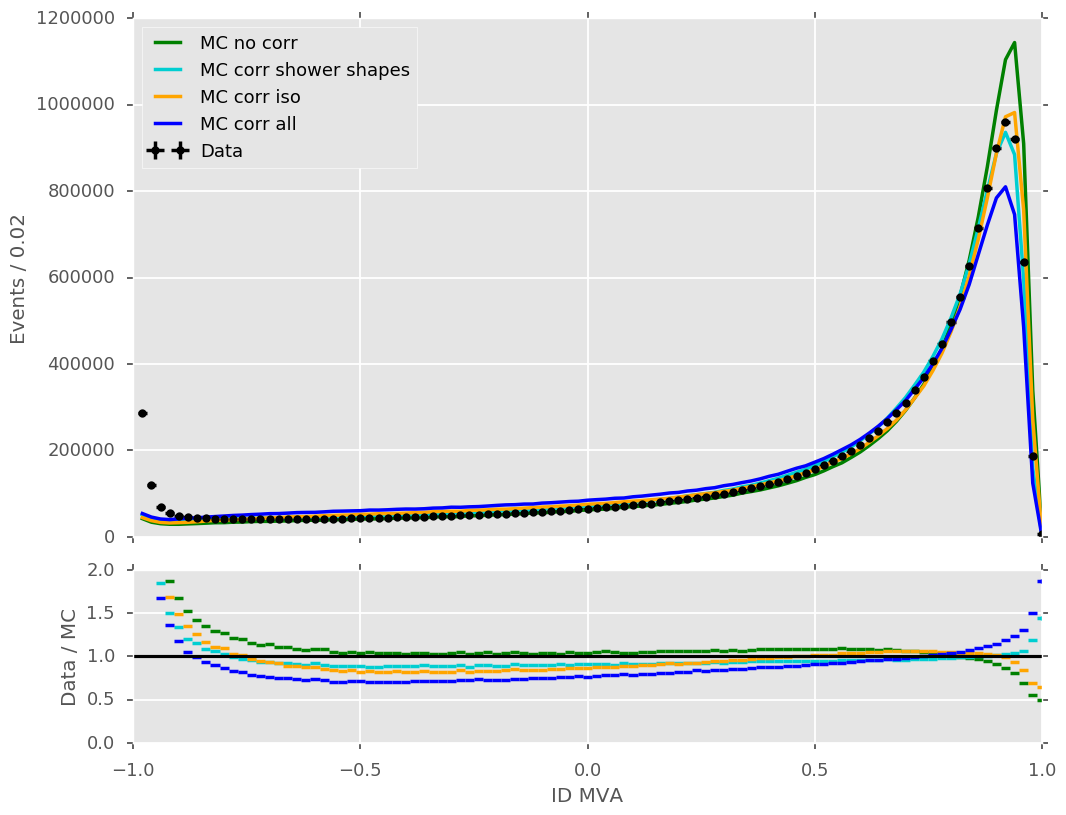

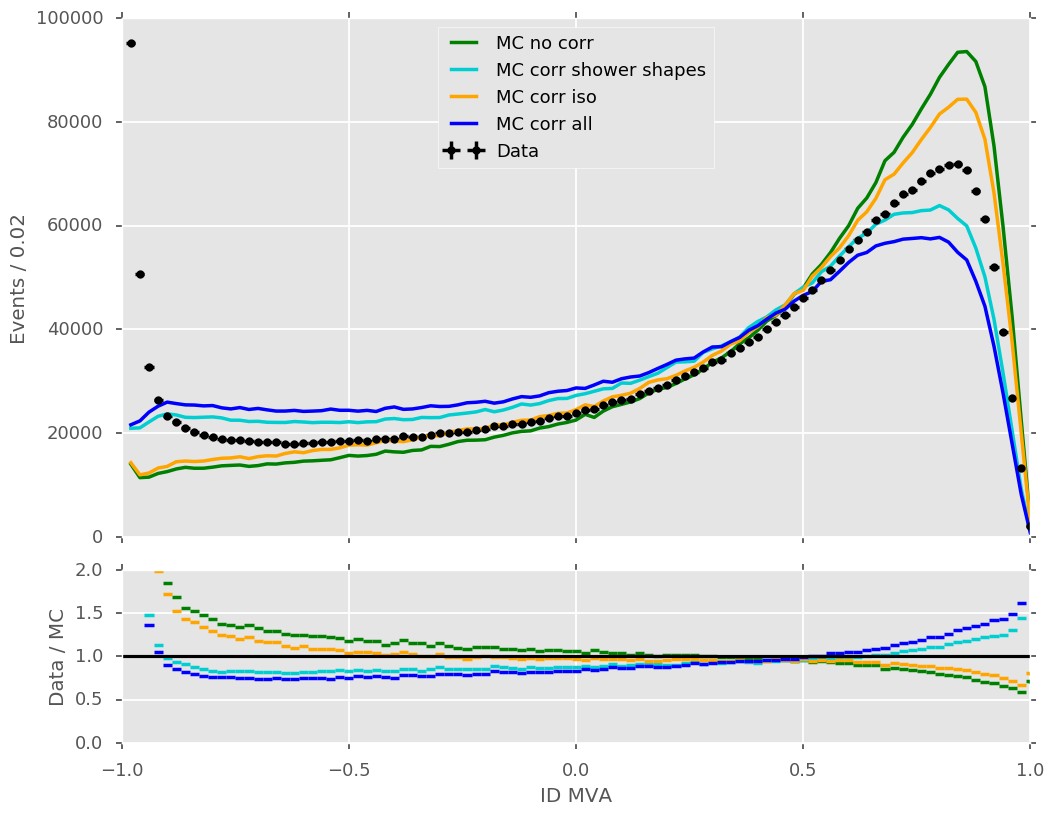

In [13]:
bins = np.linspace(-1,1,101)
var = 'newPhoID'
mclabels = [ '', 'corrShowerShapes', 'corrIso', 'corr' ]
mcstyles = [ dict(label='MC no corr',color='green'), 
             dict(label='MC corr shower shapes',color='darkturquoise'), 
             dict(label='MC corr iso',color='orange'),
             dict(label='MC corr all',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
#     with plt.xkcd()
#         draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', alpha=1, linewidth=2, ratio=True, figsize=(10,8))
